# Importing Libraries

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [52]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis

In [51]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df.left.value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [7]:
df.groupby('left').describe().T

left                                    0            1
satisfaction_level    count  11428.000000  3571.000000
                      mean       0.666810     0.440098
                      std        0.217104     0.263933
                      min        0.120000     0.090000
                      25%        0.540000     0.130000
                      50%        0.690000     0.410000
                      75%        0.840000     0.730000
                      max        1.000000     0.920000
last_evaluation       count  11428.000000  3571.000000
                      mean       0.715473     0.718113
                      std        0.162005     0.197673
                      min        0.360000     0.450000
                      25%        0.580000     0.520000
                      50%        0.710000     0.790000
                      75%        0.850000     0.900000
                      max        1.000000     1.000000
number_project        count  11428.000000  3571.000000
                      mean       3.786664     3.855503
                      std        0.979884     1.818165
                      min        2.000000     2.000000
                      25%        3.000000     2.000000
                      50%        4.000000     4.000000
                      75%        4.000000     6.000000
                      max        6.000000     7.000000
average_montly_hours  count  11428.000000  3571.000000
                      mean     199.060203   207.419210
                      std       45.682731    61.202825
                      min       96.000000   126.000000
                      25%      162.000000   146.000000
                      50%      198.000000   224.000000
                      75%      238.000000   262.000000
                      max      287.000000   310.000000
time_spend_company    count  11428.000000  3571.000000
                      mean       3.380032     3.876505
                      std        1.562348     0.977698
                      min        2.000000     2.000000
                      25%        2.000000     3.000000
                      50%        3.000000     4.000000
                      75%        4.000000     5.000000
                      max       10.000000     6.000000
Work_accident         count  11428.000000  3571.000000
                      mean       0.175009     0.047326
                      std        0.379991     0.212364
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000
promotion_last_5years count  11428.000000  3571.000000
                      mean       0.026251     0.005321
                      std        0.159889     0.072759
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# Feature Selection

In [9]:
df = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary']]

In [10]:
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low
14995,0.37,160,3,0,1,0,support,low
14996,0.37,143,3,0,1,0,support,low
14997,0.11,280,4,0,1,0,support,low


In [11]:
satisfaction = df.groupby('left')[['satisfaction_level']].mean().reset_index()
satisfaction

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


# Visualizations

<Axes: xlabel='left', ylabel='count'>

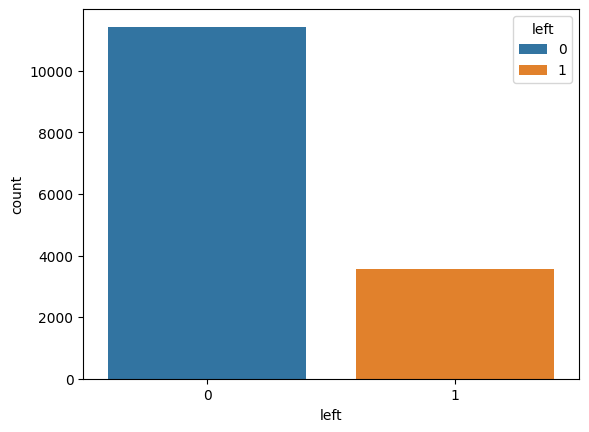

In [12]:
sns.countplot(data = df,  x = 'left', hue='left')

In [13]:
avg_monthly_hours = df.groupby('left')[['average_montly_hours']].mean()
avg_monthly_hours

,average_montly_hours
left,
0,199.060203
1,207.419210


<Axes: xlabel='left', ylabel='average_montly_hours'>

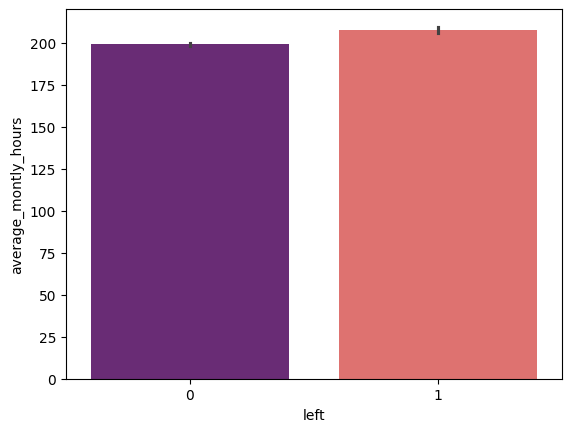

In [14]:
sns.barplot(df,x = 'left', y = 'average_montly_hours',palette='magma')

<Axes: xlabel='left', ylabel='Work_accident'>

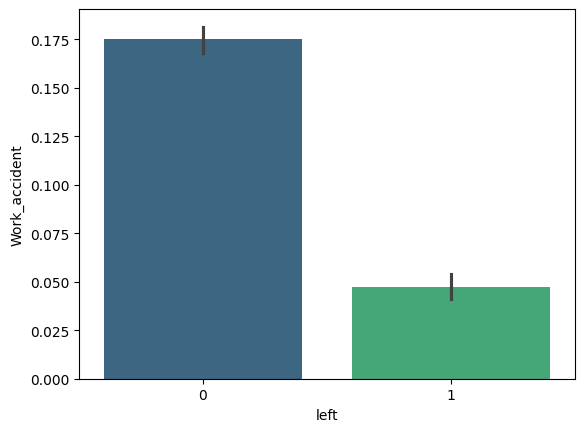

In [15]:

sns.barplot(df, x = 'left', y = 'Work_accident',palette='viridis')

In [16]:
salary_count = df.groupby('salary')[['left']].value_counts().reset_index()
salary_count

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


<Axes: xlabel='salary', ylabel='count'>

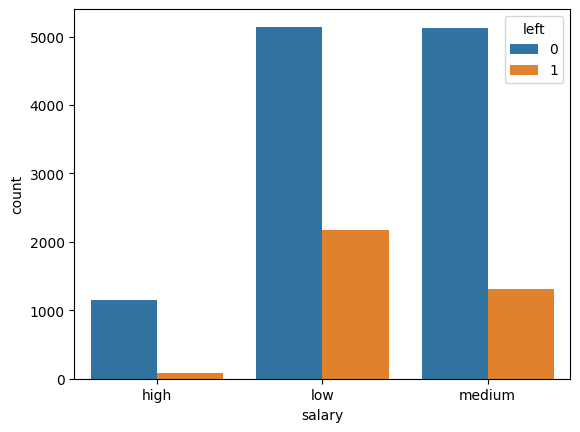

In [17]:
sns.barplot(salary_count, x='salary', y='count', hue='left')

In [18]:
dept = df.groupby('Department')[['left']].value_counts().reset_index()
dept

,Department,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


<Axes: xlabel='Department', ylabel='count'>

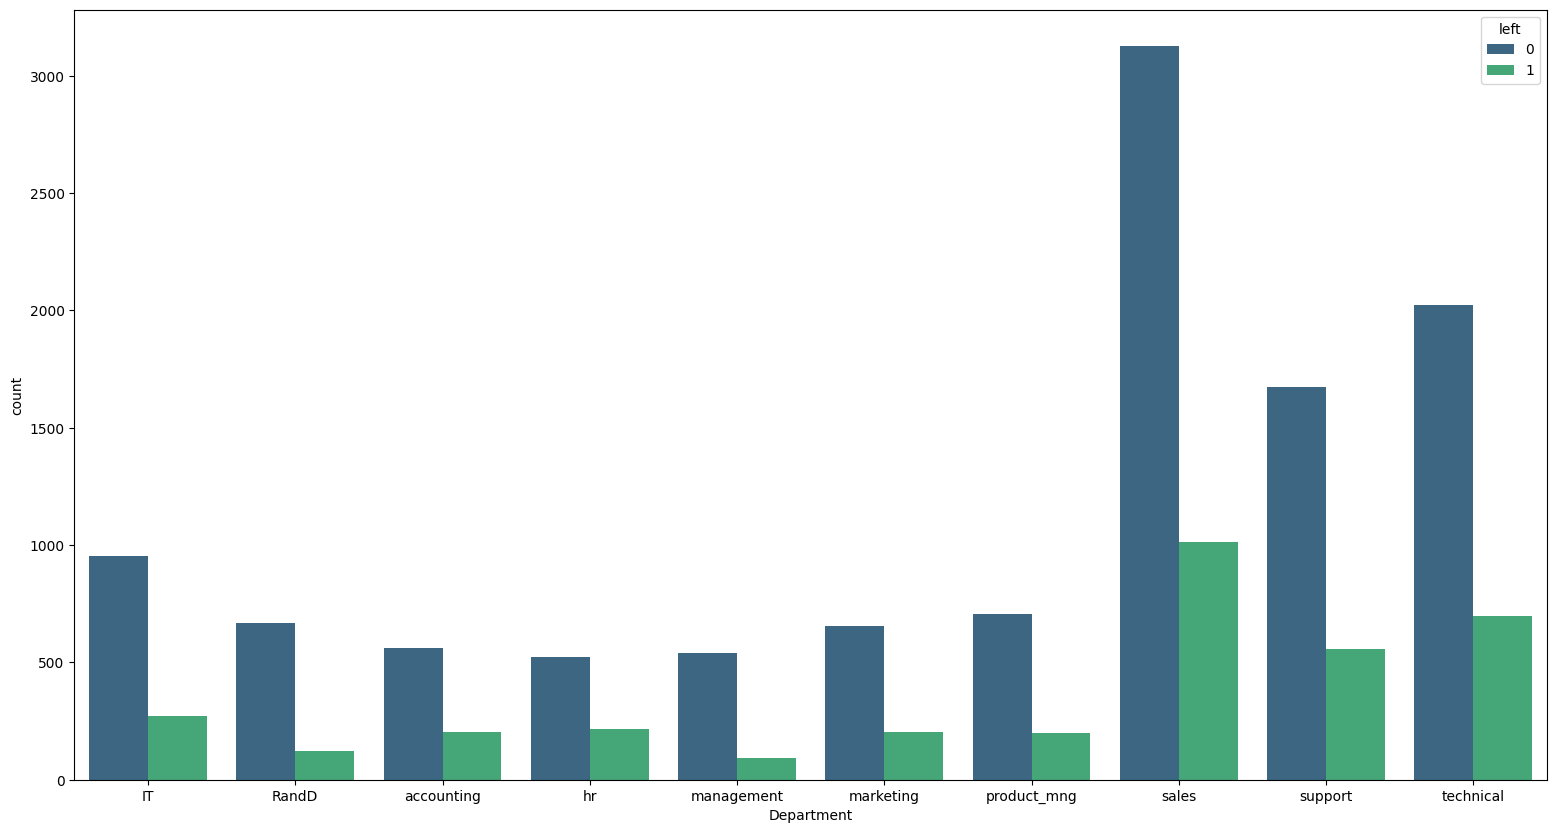

In [56]:
plt.figure(figsize=(19,10))
sns.barplot(dept, x='Department', y='count', hue='left', palette='viridis')

In [20]:
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low
14995,0.37,160,3,0,1,0,support,low
14996,0.37,143,3,0,1,0,support,low
14997,0.11,280,4,0,1,0,support,low


# One Hot encoding

In [21]:
salary = pd.get_dummies(df['salary'], prefix='salary')

In [22]:
salary

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [24]:
df = pd.concat([df, salary], axis ='columns')
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,1,0,sales,low,False,True,False
1,0.80,262,6,0,1,0,sales,medium,False,False,True
2,0.11,272,4,0,1,0,sales,medium,False,False,True
3,0.72,223,5,0,1,0,sales,low,False,True,False
4,0.37,159,3,0,1,0,sales,low,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low,False,True,False
14995,0.37,160,3,0,1,0,support,low,False,True,False
14996,0.37,143,3,0,1,0,support,low,False,True,False
14997,0.11,280,4,0,1,0,support,low,False,True,False


In [26]:
df.drop(columns='salary', inplace=True)

# Preprocessing

In [32]:
x = df.drop(columns=['left', 'Department'])
y = df['left']

In [33]:
x

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,False,True,False
1,0.80,262,6,0,0,False,False,True
2,0.11,272,4,0,0,False,False,True
3,0.72,223,5,0,0,False,True,False
4,0.37,159,3,0,0,False,True,False
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,False,True,False
14995,0.37,160,3,0,0,False,True,False
14996,0.37,143,3,0,0,False,True,False
14997,0.11,280,4,0,0,False,True,False


In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [36]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.3, random_state=42)

# Loading and Training Model

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
pred = model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
accuracy_score(y_test, pred)

0.7588888888888888

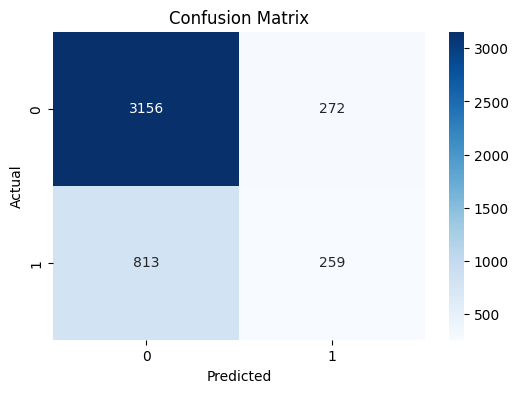

In [49]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusions

### This model (Logistic regression) works for this Problem statement